# Black Friday Sales EDA + Feature Engineering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the training data

In [3]:
df_train = pd.read_csv( 'train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Importing the test data 

In [4]:
df_test = pd.read_csv( 'test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


## Merging the two datasets for EDA

In [9]:
df = pd.concat([df_train, df_test], ignore_index = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [12]:
## Dropped useless column of User_ID
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


## Handling the Categorical Feature - Gender

In [13]:
##The map function changed F-->0 and M-->1
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


## Handling the Categorical Data - Age

In [16]:
df['Age'].unique()
df['Age'] = df['Age'].map({'0-17' : 1,'18-25' : 2,'26-35' : 3,'36-45' : 4,'46-50' : 5,'51-55' : 6,'55+' : 7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


## Handling the Categorical Data - City Category

In [21]:
city_cat = pd.get_dummies(df['City_Category'], drop_first = True)
df = pd.concat([df,city_cat], axis = 1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [26]:
df.drop('City_Category', axis = 1, inplace = True )
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


## Handling the Missing Values

In [27]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [35]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [37]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [42]:
## we replace discrete columns' missing values with mode
mode_cat_2 = df['Product_Category_2'].mode()[0]

In [43]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(mode_cat_2)
df['Product_Category_2'].isnull().sum()

0

In [44]:
mode_cat_3 = df['Product_Category_3'].mode()[0]

In [45]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(mode_cat_3)
df['Product_Category_3'].isnull().sum()

0

In [50]:
df['Stay_In_Current_City_Years'].unique()
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map({'2' : 2, '3' : 3, '4+' : 4, '1' : 1, '0' : 0})

## Comparing Purchases and Age

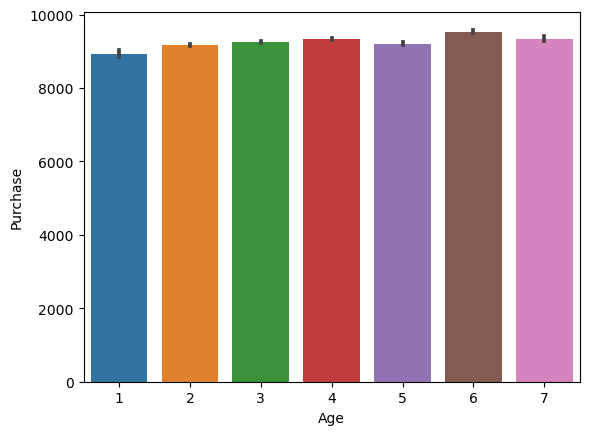

In [51]:
sns.barplot(x = 'Age',y= 'Purchase', data = df)
plt.show()

#### We see that irrespective of age, people do not have a lot of difference in purchasing behaviour

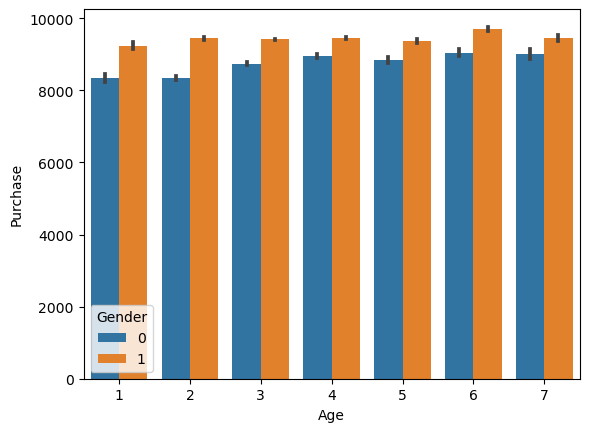

In [53]:
sns.barplot( x = 'Age', y = 'Purchase', hue = 'Gender', data = df)
plt.show()

#### Males of each Age group have bought more than females of that group, contrary to the belief that females shop more.

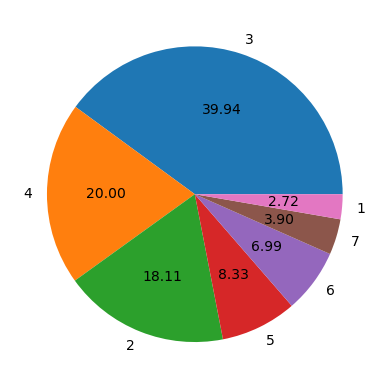

In [59]:
age_count = df['Age'].value_counts().values
ages = df['Age'].value_counts().index
plt.pie(x = age_count, labels = ages, autopct ='%1.2f')
plt.show()

#### We can See that people of ages 26-35 have bought more than anybody else followed by ages 36-45, 18-25, 46-50, 51-55, 55+, and lastly, 0-17

In [61]:
df_test = df[df['Purchase'].isnull()]
df_train = df[~df['Purchase'].isnull()]